## 🚚 Supply Chain Shipment Type Prediction

Given *supply chain data*, let's try to predict the **mode of transport** for a given shipment.

We will use a Tensorflow/Keras neural network to make our predictions.

Data source: https://www.kaggle.com/datasets/amirmotefaker/supply-chain-dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('archive/DataCoSupplyChainDataset.csv', encoding='latin-1')
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Preprocessing

In [4]:
df = data.copy()

In [5]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [6]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [7]:
# Drop unnecessary columns
unwanted_columns = ['Customer Email', 'Customer Password', 'Customer Id', 'Customer Fname', 'Customer Lname', 'Customer Street', 'Order Customer Id', 'Order Id'\
                   , 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image']

df = df.drop(unwanted_columns, axis=1)

In [8]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,Home Office,NY,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1/16/2016 3:40,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,Corporate,CA,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,1/16/2016 1:34,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,NaN,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,Corporate,CT,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,1/15/2016 21:00,1004,8.000000,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,NaN,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,Consumer,PR,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,1/15/2016 20:18,1004,12.000000,0.03,65126,399.980011,0.48,1,3

In [9]:
df.isna().mean()

Type                             0.000000
Days for shipping (real)         0.000000
Days for shipment (scheduled)    0.000000
Benefit per order                0.000000
Sales per customer               0.000000
Delivery Status                  0.000000
Late_delivery_risk               0.000000
Category Id                      0.000000
Category Name                    0.000000
Customer City                    0.000000
Customer Country                 0.000000
Customer Segment                 0.000000
Customer State                   0.000000
Customer Zipcode                 0.000017
Department Id                    0.000000
Department Name                  0.000000
Latitude                         0.000000
Longitude                        0.000000
Market                           0.000000
Order City                       0.000000
Order Country                    0.000000
order date (DateOrders)          0.000000
Order Item Cardprod Id           0.000000
Order Item Discount              0

In [10]:
# Drop Order Zipcode column and rows with missing Customer Zipcode column
df = df.drop('Order Zipcode', axis=1)

In [11]:
df = df.dropna(axis=0).reset_index(drop=True)

In [12]:
df.isna().sum().sum()

np.int64(0)

In [13]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,1/13/2018 12:27,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,1/13/2018 12:06,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,1/13/2018 11:45,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,1/13/2018 11:24,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180511,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,Home Office,NY,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1/16/2016 3:40,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180512,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,Corporate,CA,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,1/16/2016 1:34,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180513,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,Corporate,CT,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,1/15/2016 21:00,1004,8.000000,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180514,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,Consumer,PR,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,1/15/2016 20:18,1004,12.000000,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia 

In [14]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Type': 4,
 'Delivery Status': 4,
 'Category Name': 50,
 'Customer City': 562,
 'Customer Country': 2,
 'Customer Segment': 3,
 'Customer State': 44,
 'Department Name': 11,
 'Market': 5,
 'Order City': 3597,
 'Order Country': 164,
 'order date (DateOrders)': 65749,
 'Order Region': 23,
 'Order State': 1089,
 'Order Status': 9,
 'Product Name': 118,
 'shipping date (DateOrders)': 63699,
 'Shipping Mode': 4}

In [15]:
{column: len(df[column].unique()) for column in ['Category Id', 'Department Id', 'Customer Zipcode', 'Order Item Cardprod Id', 'Order Item Id']}

{'Category Id': 51,
 'Department Id': 11,
 'Customer Zipcode': 995,
 'Order Item Cardprod Id': 118,
 'Order Item Id': 180516}

In [16]:
# Drop columns with high cardinality
df = df.drop(['Order Item Id', 'Order City', 'Order State'], axis=1)

In [17]:
# Working with date features
for column in ['order date (DateOrders)', 'shipping date (DateOrders)']:
    df[column] = pd.to_datetime(df[column])
    df[column + "_Year"] = df[column].apply(lambda x: x.year)
    df[column + "_Month"] = df[column].apply(lambda x: x.month)
    df[column + "_Day"] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)

In [18]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order Country,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Name,Product Price,Product Status,Shipping Mode,order date (DateOrders)_Year,order date (DateOrders)_Month,order date (DateOrders)_Day,shipping date (DateOrders)_Year,shipping date (DateOrders)_Month,shipping date (DateOrders)_Day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,1360,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,COMPLETE,Smart watch,327.750000,0,Standard Class,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,India,1360,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,PENDING,Smart watch,327.750000,0,Standard Class,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,India,1360,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,CLOSED,Smart watch,327.750000,0,Standard Class,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Australia,1360,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,COMPLETE,Smart watch,327.750000,0,Standard Class,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Australia,1360,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,PENDING_PAYMENT,Smart watch,327.750000,0,Standard Class,2018,1,13,2018,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180511,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,Home Office,NY,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,China,1004,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Standard Class,2016,1,16,2016,1,20
180512,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,Corporate,CA,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Japón,1004,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Second Class,2016,1,16,2016,1,19
180513,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,Corporate,CT,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Australia,1004,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Standard Class,2016,1,15,2016,1,20
180514,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,Consumer,PR,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Australia,1004,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Standard Class,2016,1,15,2016,1,18


In [19]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Type': 4,
 'Delivery Status': 4,
 'Category Name': 50,
 'Customer City': 562,
 'Customer Country': 2,
 'Customer Segment': 3,
 'Customer State': 44,
 'Department Name': 11,
 'Market': 5,
 'Order Country': 164,
 'Order Region': 23,
 'Order Status': 9,
 'Product Name': 118,
 'Shipping Mode': 4}

#### Encoding

In [20]:
df.select_dtypes('object').columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order Country', 'Order Region',
       'Order Status', 'Product Name', 'Shipping Mode'],
      dtype='object')

In [21]:
# Binary features
binary_features = ['Customer Country']

# Nominal features
nominal_features = ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Segment', 'Customer State', 
                    'Department Name', 'Market', 'Order Country', 'Order Region', 'Order Status', 'Product Name',
                    'Category Id', 'Department Id', 'Customer Zipcode', 'Order Item Cardprod Id']

positive_values = ['Puerto Rico']

prefixes = ['TY', 'DS', 'CN', 'CC', 'CS', 'CST', 'DN', 'MT', 'OR', 'OST', 'PN', 'SM', 'CI', 'DI', 'CZ', 'OICI']

target_feature = 'Shipping Mode'

In [22]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df

In [23]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [24]:
df = binary_encode(df, binary_features, positive_values)
df = onehot_encode(df, nominal_features, prefixes)

In [25]:
df

Days for shipping (real)  Days for shipment (scheduled)  \
0                              3                              4   
1                              5                              4   
2                              4                              4   
3                              3                              4   
4                              2                              4   
...                          ...                            ...   
180511                         4                              4   
180512                         3                              2   
180513                         5                              4   
180514                         3                              4   
180515                         4                              4   

        Benefit per order  Sales per customer  Late_delivery_risk  \
0               91.250000          314.640015                   0   
1             -249.089996          311.359985                   1   
2             -247.779999          309.720001                   0   
3               22.860001          304.809998                   0   
4              134.210007          298.250000                   0   
...                   ...                 ...                 ...   
180511          40.000000          399.980011                   0   
180512        -613.770019          395.980011                   1   
180513         141.110001          391.980011                   1   
180514         186.229996          387.980011                   0   
180515         168.949997          383.980011                   0   

        Customer Country   Latitude   Longitude  Order Item Discount  \
0                      1  18.251453  -66.037056            13.110000   
1                      1  18.279451  -66.037064            16.389999   
2                      0  37.292233 -121.881279            18.030001   
3                      0  34.125946 -118.291016            22.940001   
4                      1  18.253769  -66.037048            29.500000   
...                  ...        ...         ...                  ...   
180511                 0  40.640930  -73.942711             0.000000   
180512                 0  35.362545 -119.018700             4.000000   
180513                 0  41.629959  -72.967155             8.000000   
180514                 1  18.213350  -66.370575            12.000000   
180515                 1  18.290380  -66.370613            16.000000   

        Order Item Discount Rate  Order Item Product Price  \
0                           0.04                327.750000   
1                           0.05                327.750000   
2                           0.06                327.750000   
3                           0.07                327.750000   
4                           0.09                327.750000   
...                          ...                       ...   
180511                      0.00                399.980011   
180512                      0.01                399.980011   
180513                      0.02                399.980011   
180514                      0.03                399.980011   
180515                      0.04                399.980011   

        Order Item Profit Ratio  Order Item Quantity       Sales  \
0                          0.29                    1  327.750000   
1                         -0.80                    1  327.750000   
2                         -0.80                    1  327.750000   
3                          0.08                    1  327.750000   
4                          0.45                    1  327.750000   
...                         ...                  ...         ...   
180511                     0.10                    1  399.980011   
180512                    -1.55                    1  399.980011   
180513                     0.36                    1  399.980011   
180514                     0.48                    1  399.980011   
180515          

In [26]:
# Split df into X and y
y = df['Shipping Mode'].copy()
X = df.drop('Shipping Mode', axis=1)

In [27]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [28]:
X_train

Days for shipping (real)  Days for shipment (scheduled)  \
112558                         0                              0   
134063                         4                              4   
111183                         0                              0   
165188                         3                              4   
74503                          6                              4   
...                          ...                            ...   
73349                          2                              4   
109259                         3                              4   
50057                          3                              2   
5192                           3                              4   
128037                         2                              4   

        Benefit per order  Sales per customer  Late_delivery_risk  \
112558          73.769997          163.929993                   0   
134063         -62.250000           41.500000                   0   
111183         113.879997          232.410004                   0   
165188          65.099998          232.500000                   0   
74503           44.000000          159.990005                   1   
...                   ...                 ...                 ...   
73349           16.600000          165.990005                   0   
109259        -184.770004          263.959992                   0   
50057          136.690002          278.950012                   1   
5192            12.550000          167.369995                   0   
128037        -160.039993           69.580002                   0   

        Customer Country   Latitude   Longitude  Order Item Discount  \
112558                 1  18.260565  -66.370613            35.990002   
134063                 0  41.346970  -81.826317             8.500000   
111183                 0  33.976860 -117.969612            17.490000   
165188                 0  41.904121  -87.712410            17.500000   
74503                  1  18.298693  -66.370506            40.000000   
...                  ...        ...         ...                  ...   
73349                  1  18.296148  -66.370605            34.000000   
109259                 0  33.502449 -117.132553            35.990002   
50057                  0  41.893967  -88.096603            21.000000   
5192                   0  32.959442  -96.768135            12.600000   
128037                 0  39.956730  -75.195259            10.400000   

        Order Item Discount Rate  Order Item Product Price  \
112558                      0.18                 49.980000   
134063                      0.17                 50.000000   
111183                      0.07                 49.980000   
165188                      0.07                 50.000000   
74503                       0.20                199.990005   
...                          ...                       ...   
73349                       0.17                199.990005   
109259                      0.12                 59.990002   
50057                       0.07                 59.990002   
5192                        0.07                 59.990002   
128037                      0.13                 39.990002   

        Order Item Profit Ratio  Order Item Quantity       Sales  \
112558                     0.45                    4  199.919998   
134063                    -1.50                    1   50.000000   
111183                     0.49                    5  249.899994   
165188                     0.28                    5  250.000000   
74503                      0.28                    1  199.990005   
...                         ...                  ...         ...   
73349                      0.10                    1  199.990005   
109259                    -0.70                    5  299.950012   
50057                      0.49                    5  299.950012   
5192                       0.08                    3  179.970001   
128037          

In [29]:
y_train.unique()

array(['Same Day', 'Standard Class', 'First Class', 'Second Class'],
      dtype=object)

In [30]:
LABEL_MAPPING = {
    'Same Day': 0,
    'Second Class': 1,
    'Standard Class': 2,
    'First Class': 3
}

# Encode the labels
y_train = y_train.replace(LABEL_MAPPING)
y_test = y_test.replace(LABEL_MAPPING)

/tmp/ipykernel_3407/1202261621.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(LABEL_MAPPING)
/tmp/ipykernel_3407/1202261621.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(LABEL_MAPPING)


In [31]:
y_train

112558    0
134063    2
111183    0
165188    2
74503     2
         ..
73349     2
109259    2
50057     1
5192      2
128037    2
Name: Shipping Mode, Length: 126361, dtype: int64

In [32]:
y_test

19954     0
3026      2
131126    2
175903    3
125955    1
         ..
69418     1
9189      2
140418    1
122907    1
61967     2
Name: Shipping Mode, Length: 54155, dtype: int64

In [33]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

### Training

In [34]:
X_train.shape

(126361, 2196)

In [35]:
inputs = tf.keras.Input(shape=(2196,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

2025-10-14 12:05:14.872804: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 887956992 exceeds 10% of free system memory.


Epoch 1/100
3154/3159 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8268 - loss: 0.4468

2025-10-14 12:05:36.076407: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 221998032 exceeds 10% of free system memory.


3159/3159 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9157 - loss: 0.2202 - val_accuracy: 0.9749 - val_loss: 0.0728
Epoch 2/100
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9872 - loss: 0.0386 - val_accuracy: 0.9871 - val_loss: 0.0392
Epoch 3/100
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9936 - val_loss: 0.0212
Epoch 4/100
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9948 - val_loss: 0.0198
Epoch 5/100
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9963 - loss: 0.0122 - val_accuracy: 0.9952 - val_loss: 0.0167
Epoch 6/100
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9975 - loss: 0.0089 - val_accuracy: 0.9964 - val_loss: 0.0139
Epoch 7/100
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9978 - loss: 0.0074 - val_accuracy: 0.9973 - val_loss: 0.0120
Epoch 8/100
3159/3159 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9981 - loss: 0.006

In [36]:
y_train.value_counts()

Shipping Mode
2    75474
1    24665
3    19476
0     6746
Name: count, dtype: int64

### Results

In [38]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

  32/1693 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

2025-10-14 12:15:16.604670: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 475697520 exceeds 10% of free system memory.


1693/1693 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


array([0, 2, 2, ..., 1, 1, 2], shape=(54155,))

In [40]:
list(LABEL_MAPPING.values())

[0, 1, 2, 3]

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=list(LABEL_MAPPING.values()))
clr = classification_report(y_test, y_pred, labels=list(LABEL_MAPPING.values()), target_names=list(LABEL_MAPPING.keys()))

print("Test Set Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test, verbose=0)[1] * 100))

2025-10-14 12:18:29.468547: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 475697520 exceeds 10% of free system memory.


Test Set Accuracy: 99.72%


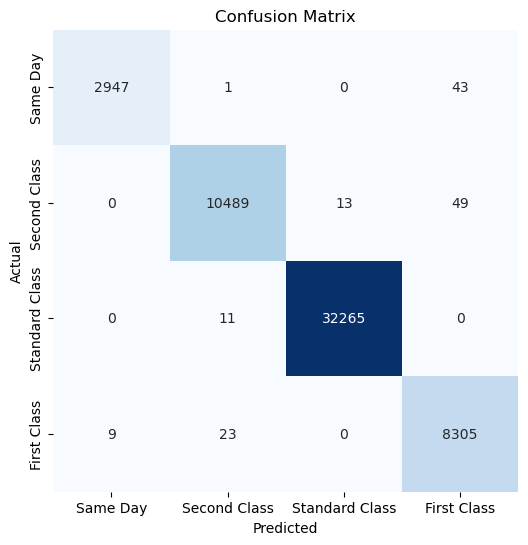

Classification Report:
------------------------------------
                 precision    recall  f1-score   support

      Same Day       1.00      0.99      0.99      2991
  Second Class       1.00      0.99      1.00     10551
Standard Class       1.00      1.00      1.00     32276
   First Class       0.99      1.00      0.99      8337

      accuracy                           1.00     54155
     macro avg       1.00      0.99      0.99     54155
  weighted avg       1.00      1.00      1.00     54155



In [42]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=list(LABEL_MAPPING.keys()))
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n------------------------------------\n", clr)